Version 1.0.3

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [2]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [3]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [4]:
# YOUR CODE GOES HERE
df_list = [transactions, items, item_categories, shops]
for df in df_list:
    print (df.shape)

(2935849, 6)
(22170, 3)
(84, 2)
(60, 2)


In [5]:
# transactions['date'] = pd.to_datetime(transactions.date, format='%d.%m.%Y')
dates = transactions.date.str.split('.', expand=True).astype(int)
transactions['day'] = dates[0]
transactions['month'] = dates[1]
transactions['year'] = dates[2]
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
0,02.01.2013,0,59,22154,999.00,1.0,2,1,2013
1,03.01.2013,0,25,2552,899.00,1.0,3,1,2013
2,05.01.2013,0,25,2552,899.00,-1.0,5,1,2013
3,06.01.2013,0,25,2554,1709.05,1.0,6,1,2013
4,15.01.2013,0,25,2555,1099.00,1.0,15,1,2013


In [6]:
q1 = transactions[transactions.year == 2014][transactions.month == 9]
q1['gain'] = q1.item_price * q1.item_cnt_day
q1.head()

<ipython-input-6-ee6ead5e8c15>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q1 = transactions[transactions.year == 2014][transactions.month == 9]


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,gain
1953691,24.09.2014,20,5,1039,899.0,1.0,24,9,2014,899.0
1953692,27.09.2014,20,5,1015,449.0,1.0,27,9,2014,449.0
1953693,07.09.2014,20,5,1329,399.0,1.0,7,9,2014,399.0
1953694,27.09.2014,20,5,984,399.0,1.0,27,9,2014,399.0
1953695,08.09.2014,20,5,984,399.0,1.0,8,9,2014,399.0


In [7]:
a1 = q1.groupby('shop_id').sum().gain.max()
a1

7982852.199999956

Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with strings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [8]:
# YOUR CODE GOES HERE

max_revenue = a1 # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.199999956


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [9]:
q2 = transactions[transactions.year == 2014][transactions.month >= 6][transactions.month <= 8][['item_id', 'item_cnt_day', 'item_price']]
q2['gain'] = q2.item_price * q2.item_cnt_day
q2['item_cat'] = [items.iloc[id].item_category_id for id in q2.item_id]
q2.head()

<ipython-input-9-383fb16ad0d6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q2 = transactions[transactions.year == 2014][transactions.month >= 6][transactions.month <= 8][['item_id', 'item_cnt_day', 'item_price']]


,item_id,item_cnt_day,item_price,gain,item_cat
1705909,9532,1.0,399.00,399.00,30
1705910,9507,1.0,149.00,149.00,40
1705911,9509,1.0,246.32,246.32,37
1705912,9532,1.0,399.00,399.00,30
1705913,9532,1.0,399.00,399.00,30


In [10]:
q2 = q2.groupby('item_cat').sum()
q2.head()

,item_id,item_cnt_day,item_price,gain
item_cat,,,,
2,7302733,1180.0,2727215.50,2755520.0
3,18439062,2910.0,6231604.85,6854669.8
4,748239,135.0,38235.20,38833.2
5,3163795,574.0,414318.10,418233.1
6,14878062,1978.0,3151830.50,3360382.5


In [11]:
a2 = q2[q2.gain == q2.gain.max()]
a2

,item_id,item_cnt_day,item_price,gain
item_cat,,,,
20,51093364,12513.0,2.031695e+07,32157302.43


In [12]:
# YOUR CODE GOES HERE

category_id_with_max_revenue = a2.index[0]    # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [13]:
q3 = transactions[['item_id', 'item_price']].groupby('item_id')
a3 = (q3.min() == q3.max()).item_price.sum()
a3

5926

In [14]:
# YOUR CODE GOES HERE

num_items_constant_price = a3   # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [15]:
q4 = transactions[transactions.shop_id==25][transactions.month==12][transactions.year== 2014].groupby('day').sum()

<ipython-input-15-013854f06b6a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q4 = transactions[transactions.shop_id==25][transactions.month==12][transactions.year== 2014].groupby('day').sum()


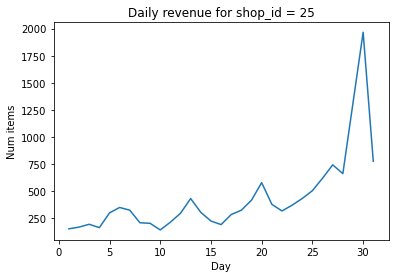

Current answer for task total_num_items_sold_var is: 117167.70229885059


In [16]:
shop_id = 25


total_num_items_sold = q4.item_cnt_day        # YOUR CODE GOES HERE
days = q4.index                                 # YOUR CODE GOES HERE

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = total_num_items_sold.var()    # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [17]:
STUDENT_EMAIL = 'pkb18u10079@btech.nitdgp.ac.in' # EMAIL HERE
STUDENT_TOKEN = 'o5BLNQNJR9vEIP33' # TOKEN HERE
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.199999956
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.70229885059


In [18]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)